In [1]:
# Install Lucid

#!pip install --quiet lucid==0.3.8
# install from github to get version 0.3.9
!pip install git+https://github.com/tensorflow/lucid.git
 
# %tensorflow_version only works on colab
%tensorflow_version 1.x

  Cloning https://github.com/tensorflow/lucid.git to /tmp/pip-req-build-ev5v17e4
  Running command git clone -q https://github.com/tensorflow/lucid.git /tmp/pip-req-build-ev5v17e4
  Created wheel for lucid: filename=lucid-0.3.9-cp36-none-any.whl size=158767 sha256=3a727e2f632d979a297a2d03df64cab594236b08997f0673ea496e61d55dcf62
  Stored in directory: /tmp/pip-ephem-wheel-cache-2q_gokf0/wheels/64/c2/51/7238e75f457453774587708b21cd3cf32f9a86456648688634
Successfully built lucid
  Found existing installation: lucid 0.3.8
    Uninstalling lucid-0.3.8:
      Successfully uninstalled lucid-0.3.8
TensorFlow 1.x selected.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
assert tf.__version__.startswith('1')

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform
import lucid
from lucid.modelzoo.vision_models import Model


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
model = Model.load("/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/Models/mobile_lucid.pb")


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


512 22.183704



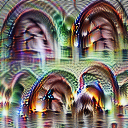

In [5]:
img = render.render_vis(model, "block_11_add_1/add:32")


512 2.4143703



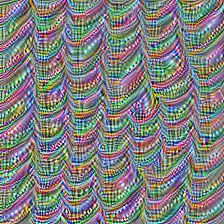

512 2.6745493



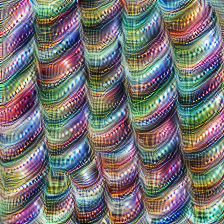

In [6]:
feature_map =  "block_7_depthwise_relu_1/Relu6:"
 #"block_11_add_1/add:"
unit = "10"
param_f = lambda: param.image(224, fft=False, decorrelate=False)
img_no_fft = render.render_vis(model, feature_map+unit, param_f)

param_f_fft = lambda: param.image(224, fft=True, decorrelate=True)
img_fft = render.render_vis(model, feature_map+unit, param_f_fft)

In [7]:
def plotable(img):
    return np.reshape(np.asarray(img, dtype='float32'),(224,224,3))

In [ ]:
! mkdir '/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/images/block_7_depthwise_relu'
 

In [ ]:
# visualize whole layer

print(feature_map)

for unit in range(24):
    print(unit)
    path = "/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/images/block_2_add/" + str(unit) + "_lucid" + ".png"
    img_fft = render.render_vis(model, feature_map+str(unit), param_f_fft)
    tf.keras.preprocessing.image.save_img(str(path), plotable(img_fft))




Output hidden; open in https://colab.research.google.com to view.

### DIVERSITY

In [10]:
transforms = [
    transform.pad(80),
    transform.jitter(40),
    transform.random_scale([0.1,1.9]),
    transform.random_rotate([90,-90]),
    transform.jitter(40)
]
param_f = lambda: param.image(224, fft=True, decorrelate=True)


In [11]:
imgs = render.render_vis(model, "block_12_add_1/add:29", 
                         transforms=transforms, param_f=param_f,
                         thresholds=(1,25, 50,55,60,65,100,105,110,112,112,123,124,125,126,127,128,129,130, 32, 128, 256), verbose=False)

 
show([img for img in imgs])

InvalidArgumentError: ignored

In [ ]:
 # visualize different learning rates
learning_rates = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
feature_map =  "block_7_add_1/add:"
 #"block_11_add_1/add:"
unit = "30"
param_f = lambda: param.image(224, fft=False, decorrelate=False)
#img_no_fft = render.render_vis(model, feature_map+unit, param_f)

param_f_fft = lambda: param.image(224, fft=True, decorrelate=True)
#img_fft = render.render_vis(model, feature_map+unit, param_f_fft)

for lr in learning_rates:
    optimizer = tf.train.AdamOptimizer(lr)

    _ = render.render_vis(model, feature_map+unit, param_f, optimizer=optimizer)
    _ = render.render_vis(model, feature_map+unit, param_f_fft, optimizer=optimizer)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_fft = tf.squeeze(img_fft)

ValueError: ignored

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/images/" + feature_map + unit
tf.keras.preprocessing.image.save_img(str(path+"fft"+".png"), img_fft)

In [ ]:
def plotable(img):
    return np.reshape(np.asarray(img, dtype='float32'),(224,224,3))

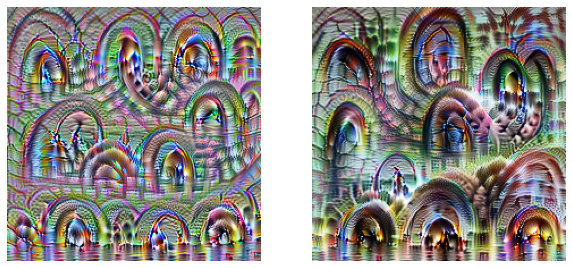

In [ ]:
 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(plotable(img_no_fft))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(plotable(img_fft))
plt.show()



In [ ]:
# save images for NEB Visualization
feature_map = "block_11_add_1_add:"

img_fft = plotable(img_fft)
img_no_fft = plotable(img_no_fft)
path = "/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/images/" + feature_map + unit
tf.keras.preprocessing.image.save_img(str(path+"fft"+".png"), img_fft)
tf.keras.preprocessing.image.save_img(str(path+"nofft"+".png"), img_no_fft)


512 40.56055



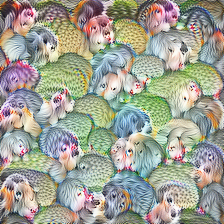

In [50]:
feature_map = "block_8_add_1/add:"
unit = "50"
param_f = lambda: param.image(224, fft=False, decorrelate=False)
#img_no_fft = render.render_vis(model, feature_map+unit, param_f)

param_f_fft = lambda: param.image(224, fft=True, decorrelate=True)
#img_fft = render.render_vis(model, feature_map+unit, param_f_fft)
#img = render.render_vis(model, feature_map+unit, param_f)
img_fft = render.render_vis(model, feature_map+unit, param_f_fft)

In [48]:
layer = "block_12_add"
model_mobile = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
feature_map_2 = model_mobile.get_layer(layer).output[:,:,:,int(unit)] 


visualization_model = tf.keras.Model(
                            inputs=model_mobile.inputs, 
                            outputs=feature_map_2
                        )
out_fm = visualization_model(img)
average_activation = tf.reduce_mean(out_fm)
out_fm_fft = visualization_model(img_fft)
average_activation_fft = tf.reduce_mean(out_fm_fft)
 

KeyboardInterrupt: ignored

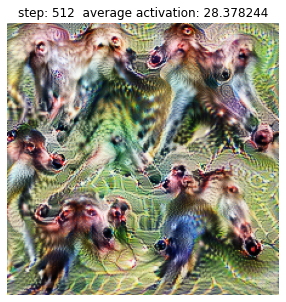

In [49]:
# plot image
layer = "block_4_add"

aa = tf.get_static_value(average_activation)

fig = plt.figure(figsize=(5,5))
plt.axis('off')
img_show = plotable(img_fft)
plt.imshow(img_show)
plt.title("step: " + "512" + "  average activation: "+ str(28.378244))
fig.savefig("/content/drive/My Drive/Colab Notebooks/Bachelor Arbeit/plots/" + str(layer) + "_" + str(unit) + "_" + "lucid_fft" + ".png", bbox_inches='tight')
plt.show()

### NEB Visualizations with lucid